In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df_my2023= pd.read_csv("MY2023 Fuel Consumption Ratings.csv", encoding= 'latin')

C:\Users\rafae\AppData\Local\Temp\ipykernel_13980\3776565976.py:1: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_my2023= pd.read_csv("MY2023 Fuel Consumption Ratings.csv", encoding= 'latin')


In [4]:
df_my2023

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,...,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

def eda_inicial(df):
    """
    Realiza un Análisis Exploratorio de Datos (EDA) inicial en un DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame que se analizará.

    Returns
    -------
    None

    Prints
    ------
    None
        Imprime información sobre el DataFrame, incluyendo nombre y tipo de columnas,
        número de filas y valores nulos.
    None
        Imprime el número de duplicados en el DataFrame.
    None
        Imprime estadísticas descriptivas de las columnas.
    """
    # Obtener información del DataFrame, incluyendo nombre y tipo de columnas,
    # número de filas y valores nulos.
    print(df.info(), "\n")

    # Obtener los duplicados considerando todas las columnas.
    print(f"El número de duplicados en el DataFrame es: {df.duplicated().sum()} \n")

    # Describir las columnas.
    print(df.describe(include="all"), "\n")




In [7]:
eda_inicial(df_my2023)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Columns: 224 entries, Model to Unnamed: 223
dtypes: float64(210), object(14)
memory usage: 12.6+ MB
None 

El número de duplicados en el DataFrame es: 6500 

       Model  Make  Model.1 Vehicle Class Engine Size   Cylinders   
count    842   854      833           833         834  833.000000  \
unique    10    60      657            14          32         NaN   
top     2023  Ford  Mustang    SUV: Small         2.0         NaN   
freq     833    93        5           195         193         NaN   
mean     NaN   NaN      NaN           NaN         NaN    5.627851   
std      NaN   NaN      NaN           NaN         NaN    1.968695   
min      NaN   NaN      NaN           NaN         NaN    3.000000   
25%      NaN   NaN      NaN           NaN         NaN    4.000000   
50%      NaN   NaN      NaN           NaN         NaN    6.000000   
75%      NaN   NaN      NaN           NaN         NaN    6.000000   
max      

In [8]:
def eliminar_nulos(df):
    # Eliminar columnas con todas las entradas nulas
    df = df.dropna(axis=1, how='all')

    # Eliminar filas con todas las entradas nulas
    df = df.dropna(axis=0, how='all')

    return df

In [9]:
eliminar_nulos(df_my2023)

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_my2023 = eliminar_nulos(df_my2023)

In [11]:
eda_inicial(df_my2023)

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 0 to 856
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             842 non-null    object 
 1   Make              854 non-null    object 
 2   Model.1           833 non-null    object 
 3   Vehicle Class     833 non-null    object 
 4   Engine Size       834 non-null    object 
 5   Cylinders         833 non-null    float64
 6   Transmission      833 non-null    object 
 7   Fuel              834 non-null    object 
 8   Fuel Consumption  834 non-null    object 
 9   Unnamed: 9        834 non-null    object 
 10  Unnamed: 10       834 non-null    object 
 11  Unnamed: 11       834 non-null    object 
 12  CO2 Emissions     834 non-null    object 
 13  CO2               834 non-null    object 
 14  Smog              834 non-null    object 
dtypes: float64(1), object(14)
memory usage: 107.0+ KB
None 

El número de duplicados en el DataFrame

In [12]:
mapeo_nombres = {'Model': 'Model_Year', 'Engine Size': 'Engine_Size (L)', 'Fuel': 'Fuel_type','Fuel Consumption' : 
    'Fuel_Con_City', 'Unnamed: 9':'Fuel_Con_Hwy','Unnamed: 10':'Fuel_Con_Comb', 'Unnamed: 11':'Fuel_Con_Comb(Mpg)',
    'CO2 Emissions' : 'CO2 Emissions(g/km)', 'CO2' : 'CO2_rating', 'Smog': 'Smog_rating'}
df_my2023= df_my2023.rename(columns=mapeo_nombres)
df_my2023 = df_my2023.drop(df_my2023.index[0])
df_my2023


,Model_Year,Make,Model.1,Vehicle Class,Engine_Size (L),Cylinders,Transmission,Fuel_type,Fuel_Con_City,Fuel_Con_Hwy,Fuel_Con_Comb,Fuel_Con_Comb(Mpg),CO2 Emissions(g/km),CO2_rating,Smog_rating
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
5,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_my2023.tail(30)

,Model_Year,Make,Model.1,Vehicle Class,Engine_Size (L),Cylinders,Transmission,Fuel_type,Fuel_Con_City,Fuel_Con_Hwy,Fuel_Con_Comb,Fuel_Con_Comb(Mpg),CO2 Emissions(g/km),CO2_rating,Smog_rating
826,2023,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4.0,AS8,Z,10.1,7.7,9.0,31,211,5,5
827,2023,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4.0,AS8,Z,10.9,8.3,9.7,29,227,5,7
828,2023,Volvo,XC40 B4 AWD,SUV: Small,2.0,4.0,AS8,Z,10.0,7.6,8.9,32,208,5,5
829,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31,215,5,5
830,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30,218,5,5
831,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28,233,5,7
832,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29,223,5,5
833,2023,Volvo,XC90 B6 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.9,9.1,10.6,27,249,5,7
835,Understanding the table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,Model,4WD/4X4 = Four-wheel drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

def eliminar_filas_por_indice(df, indice_inicial, indice_final):
    """
    Elimina las filas del DataFrame en el rango de índices dado.

    Parameters:
    - df: DataFrame original.
    - indice_inicial: Índice inicial del rango a eliminar.
    - indice_final: Índice final del rango a eliminar.

    Returns:
    - DataFrame modificado.
    """
    # Verifica si los índices existen en el DataFrame antes de intentar eliminarlos
    if indice_inicial in df.index and indice_final in df.index:
        df = df.drop(range(indice_inicial, indice_final + 1))

    return df


In [15]:
eliminar_filas_por_indice(df_my2023, 835, 856)


,Model_Year,Make,Model.1,Vehicle Class,Engine_Size (L),Cylinders,Transmission,Fuel_type,Fuel_Con_City,Fuel_Con_Hwy,Fuel_Con_Comb,Fuel_Con_Comb(Mpg),CO2 Emissions(g/km),CO2_rating,Smog_rating
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
5,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31,215,5,5
830,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30,218,5,5
831,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28,233,5,7
832,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29,223,5,5


In [16]:
df_my2023 = eliminar_filas_por_indice(df_my2023, 835, 856)

In [17]:
df_my2023

,Model_Year,Make,Model.1,Vehicle Class,Engine_Size (L),Cylinders,Transmission,Fuel_type,Fuel_Con_City,Fuel_Con_Hwy,Fuel_Con_Comb,Fuel_Con_Comb(Mpg),CO2 Emissions(g/km),CO2_rating,Smog_rating
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5
5,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31,215,5,5
830,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30,218,5,5
831,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28,233,5,7
832,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29,223,5,5


In [18]:
df_my2023.dtypes

Model_Year              object
Make                    object
Model.1                 object
Vehicle Class           object
Engine_Size (L)         object
Cylinders              float64
Transmission            object
Fuel_type               object
Fuel_Con_City           object
Fuel_Con_Hwy            object
Fuel_Con_Comb           object
Fuel_Con_Comb(Mpg)      object
CO2 Emissions(g/km)     object
CO2_rating              object
Smog_rating             object
dtype: object

In [19]:
def cambiar_tipos_de_datos(df):
    """
    Cambia los tipos de datos de las columnas en un DataFrame.

    Parameters:
    - df: DataFrame original.

    Returns:
    - DataFrame con tipos de datos modificados.
    """
    # Definir un diccionario con los nombres de las columnas y los tipos de datos deseados
    tipos_de_datos = {
        'Model_Year': int,
        'Make': str,
        'Model.1': str,
        'Vehicle Class': str,
        'Engine_Size (L)': float,
        'Cylinders': float,
        'Transmission': str,
        'Fuel_type': str,
        'Fuel_Con_City': float,
        'Fuel_Con_Hwy': float,
        'Fuel_Con_Comb': float,
        'Fuel_Con_Comb(Mpg)': float,
        'CO2 Emissions(g/km)': int,
        'CO2_rating': int,
        'Smog_rating': int
    }

    # Aplicar el cambio de tipos de datos utilizando el método astype
    df = df.astype(tipos_de_datos)

    return df

In [20]:
df_my2023 = cambiar_tipos_de_datos(df_my2023)
df_my2023.dtypes

Model_Year               int32
Make                    object
Model.1                 object
Vehicle Class           object
Engine_Size (L)        float64
Cylinders              float64
Transmission            object
Fuel_type               object
Fuel_Con_City          float64
Fuel_Con_Hwy           float64
Fuel_Con_Comb          float64
Fuel_Con_Comb(Mpg)     float64
CO2 Emissions(g/km)      int32
CO2_rating               int32
Smog_rating              int32
dtype: object

In [21]:
df_my2023

,Model_Year,Make,Model.1,Vehicle Class,Engine_Size (L),Cylinders,Transmission,Fuel_type,Fuel_Con_City,Fuel_Con_Hwy,Fuel_Con_Comb,Fuel_Con_Comb(Mpg),CO2 Emissions(g/km),CO2_rating,Smog_rating
1,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172,6,7
3,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181,6,6
4,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263,4,5
5,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.2,7.9,9.2,31.0,215,5,5
830,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,8.2,9.4,30.0,218,5,5
831,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.1,8.7,10.0,28.0,233,5,7
832,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4.0,AS8,Z,10.5,8.4,9.6,29.0,223,5,5


In [22]:
def get_outliers_df(df, exclude = [], size = (16,8), ylim= None):
    """
    Crea un boxplot para visualizar los valores atípicos en las columnas numéricas 
    de un DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame que se utilizará para crear el boxplot.
    exclude : list, optional
        Lista de columnas a excluir del boxplot. Por defecto, es una lista vacía.
    size : tuple, optional
        Tamaño de la figura. Por defecto, es (16, 8).
    ylim : tuple, optional
        Límites del eje y. Por defecto, se ajusta automáticamente.

    Returns
    -------
    None

    Prints
    ------
    None
        Muestra un boxplot de todas las columnas numéricas del DataFrame excluyendo las especificadas en "exclude".
    """
    # Configurar el tamaño de la figura.
    plt.figure(figsize=size)

    # Crear el boxplot con todas las columnas numéricas no incluidas en "exclude".
    sns.boxplot(data=df.drop(exclude, axis=1))

    # Personalizar el título y las etiquetas de los ejes.
    plt.title("Boxplot de las Columnas Numéricas")
    plt.xlabel("Columnas")
    plt.ylabel("Valores")

    # Ajustar las etiquetas del eje x para mejorar la legibilidad.
    plt.xticks(rotation=45, ha="right")

    # Ajustar los límites del eje y.
    plt.ylim(ylim)

    # Mostrar el gráfico.
    plt.show()


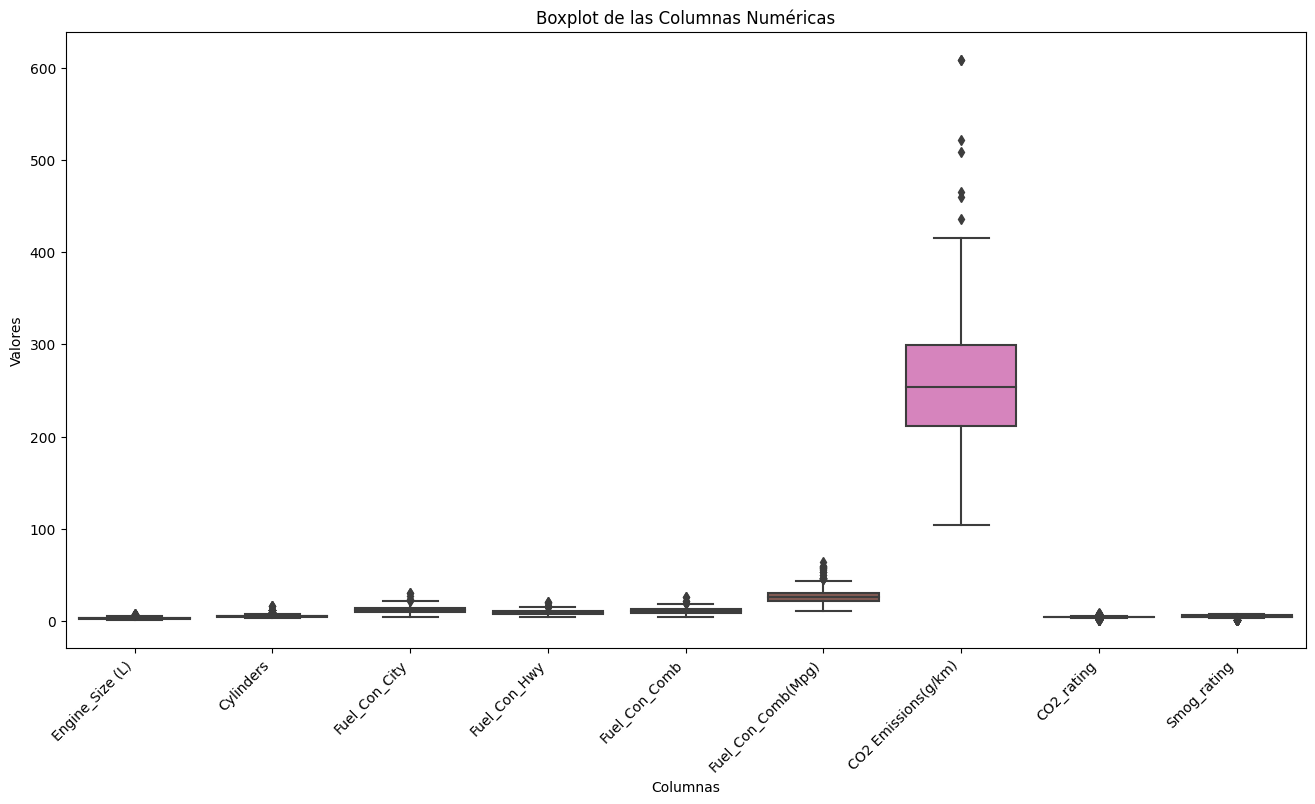

In [23]:
get_outliers_df(df_my2023, exclude = ['Model_Year'], size = (16,8), ylim= None)

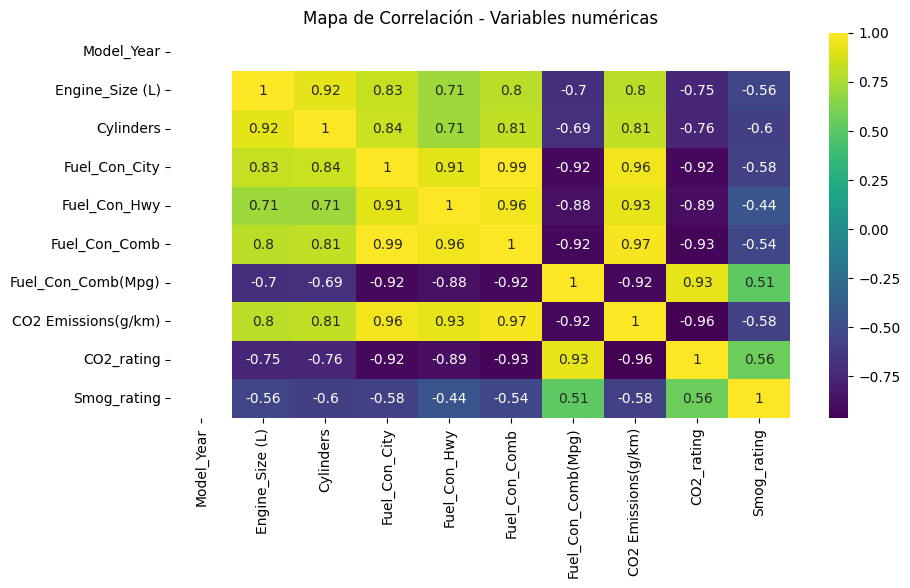

In [24]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df_my2023.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()